In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [94]:
DATA_PATH = "run_log_default_test.csv"
DATA_AH_TOGGLE_PATH = "run_log_af_toggle_test.csv"
DATA_AH_TOGGLE_FIXED_POINTS_PATH = "run_log_af_toggle_fixed_points.csv"

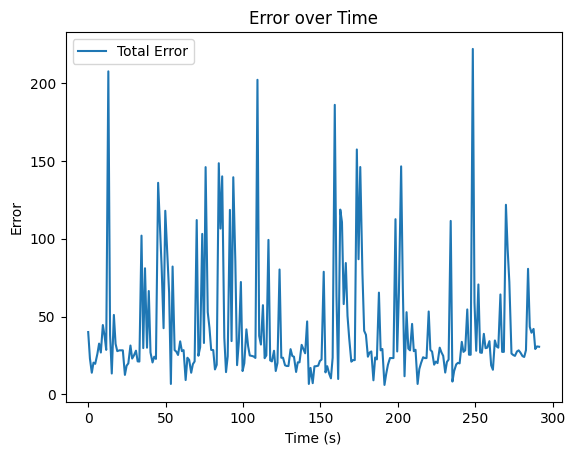

In [95]:

df = pd.read_csv(DATA_PATH)
columns = ["p_id", "error_x", "error_y", "timestamp"]
df.columns = columns

df['timestamp_sec'] = (
    pd.to_datetime(df['timestamp']) - pd.to_datetime(df['timestamp'].iloc[0])
).dt.total_seconds()

error = np.sqrt(df['error_x']**2 + df['error_y']**2)
plt.plot(df['timestamp_sec'], error, label='Total Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error over Time')
plt.legend()
plt.show()

In [96]:
df

,p_id,error_x,error_y,timestamp,timestamp_sec
0,-1,-40.0,2.0,2025-08-21T18:52:25.928392,0.000000
1,-1,-23.0,1.0,2025-08-21T18:52:27.047298,1.118906
2,0,-13.0,5.0,2025-08-21T18:52:28.249577,2.321185
3,0,-20.0,4.0,2025-08-21T18:52:29.353194,3.424802
4,0,-19.0,5.0,2025-08-21T18:52:30.458902,4.530510
...,...,...,...,...,...
241,79,-27.0,-29.0,2025-08-21T18:57:12.268634,286.340242
242,80,13.0,-40.0,2025-08-21T18:57:13.619011,287.690619
243,80,-15.0,-25.0,2025-08-21T18:57:14.710505,288.782113
244,80,-18.0,-25.0,2025-08-21T18:57:15.817279,289.888887


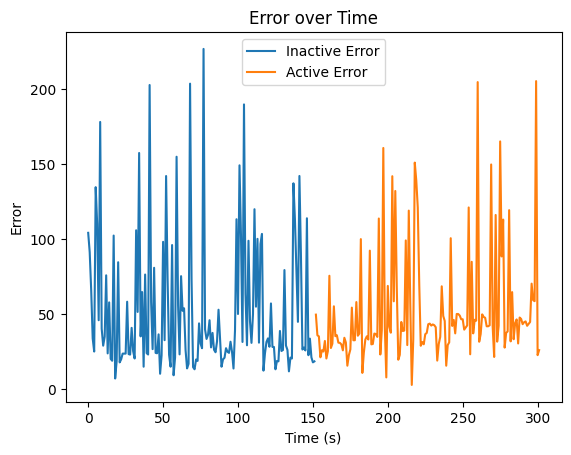

In [97]:

df = pd.read_csv(DATA_AH_TOGGLE_PATH)
columns = ["p_id", "is_active", "error_x", "error_y", "timestamp"]
df.columns = columns

df = df[df['p_id'] <= 100]

df['timestamp_sec'] = (
    pd.to_datetime(df['timestamp']) - pd.to_datetime(df['timestamp'].iloc[0])
).dt.total_seconds()

df_active = df[df['is_active'] == True]
df_inactive = df[df['is_active'] == False]

error_inactive = np.sqrt(df_inactive['error_x']**2 + df_inactive['error_y']**2)
error_active = np.sqrt(df_active['error_x']**2 + df_active['error_y']**2)

plt.plot(df_inactive.index, error_inactive, label='Inactive Error')
plt.plot(df_active.index, error_active, label='Active Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error over Time')
plt.legend()
plt.show()

In [104]:
df = pd.read_csv(DATA_AH_TOGGLE_FIXED_POINTS_PATH, header=None)
columns = ['p_id', 'point_id', 'point_x', 'point_y', 'is_active', 'error_x', 'error_y', 'timestamp']

df.columns = columns
df = df[df['p_id'] < 40]

df['timestamp_sec'] = (
    pd.to_datetime(df['timestamp']) - pd.to_datetime(df['timestamp'].iloc[0])
).dt.total_seconds()

df

,p_id,point_id,point_x,point_y,is_active,error_x,error_y,timestamp,timestamp_sec
0,0,1,453,158,False,91.0,69.0,2025-08-21T19:48:49.000746,0.000000
1,0,1,453,158,False,31.0,30.0,2025-08-21T19:48:50.072318,1.071572
2,0,1,453,158,False,13.0,1.0,2025-08-21T19:48:51.142085,2.141339
3,0,1,453,158,False,-13.0,-15.0,2025-08-21T19:48:52.276701,3.275955
4,0,1,453,158,False,-15.0,-18.0,2025-08-21T19:48:53.384599,4.383853
...,...,...,...,...,...,...,...,...,...
195,39,40,285,250,True,-46.0,-106.0,2025-08-21T19:52:26.693594,217.692848
196,39,40,285,250,True,-24.0,-24.0,2025-08-21T19:52:27.823914,218.823168
197,39,40,285,250,True,-24.0,-24.0,2025-08-21T19:52:28.922398,219.921652
198,39,40,285,250,True,-25.0,-24.0,2025-08-21T19:52:30.052582,221.051836


C:\Users\marku\AppData\Local\Temp\ipykernel_3644\629935211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['error'] = error_inactive
C:\Users\marku\AppData\Local\Temp\ipykernel_3644\629935211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['error'] = error_active


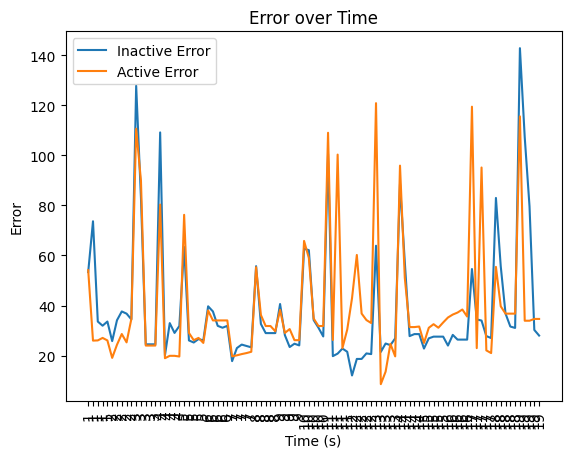

In [ ]:
df_inactive = df[df['p_id'] < 20]
df_active = df[df['p_id'] >= 20]



error_inactive = np.sqrt(df_inactive['error_x']**2 + df_inactive['error_y']**2)
error_active = np.sqrt(df_active['error_x']**2 + df_active['error_y']**2)

df_inactive['error'] = error_inactive
df_active['error'] = error_active

df_inactive = df_inactive.reset_index(drop=True)
df_active = df_active.reset_index(drop=True)

BAN_LIST = [0]
for i in BAN_LIST:
    df_inactive = df_inactive[df_inactive['p_id'] != i]
    df_active = df_active[df_active['p_id'] != i+20]
    

plt.plot(df_inactive.index, df_inactive['error'], label='Inactive Error')
plt.plot(df_active.index, df_active['error'], label='Active Error')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title('Error over Time')
plt.legend()
plt.show()

In [114]:
df_active.index

Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199],
      dtype='int64')